In [1]:
suppressPackageStartupMessages(require(tidyverse))
suppressPackageStartupMessages(require(data.table))
library(latex2exp)


In [8]:
outd <- file.path(getwd(), 'out_v3')

traits <- fread('cascade.input.files.tsv')


In [9]:
imp_anno_df <-
fread(cmd=paste('zstdcat', file.path(outd, 'cascade.imp.hits.tsv.zst'), sep=' '), sep='\t')


In [10]:
imp_anno_df %>% dim()

[1] 776  23

In [11]:
imp_anno_df %>% colnames()

[1] "ID"                "REF"               "ALT"              
 [4] "Effect"            "StdErr"            "Direction"        
 [7] "HetISq"            "HetChiSq"          "HetDf"            
[10] "HetPVal"           "maf"               "MACH_R2"          
[13] "CHROM"             "POS"               "P"                
[16] "CM"                "id"                "prev"             
[19] "block"             "name"              "is_outside_of_MHC"
[22] "is_rare"           "is_autosome"

In [12]:
p.imp <- imp_anno_df %>% 
filter(is_outside_of_MHC) %>%
group_by(name) %>%
mutate(
    rank_abs_effect = rank(-abs(Effect))
) %>%
ungroup() %>%
mutate(
    outlier = if_else(abs(Effect) >= .1, TRUE, FALSE),
    plot_label = ID,
    plot_label = str_replace(plot_label, '[(][)]$', ''),
    plot_label = str_replace(plot_label, '[(]NA[)]$', ''),
    plot_label = str_replace(plot_label, '_', ':'),    
    ggrepel = if_else((abs(Effect) >= .1) & (rank_abs_effect < 5), plot_label, "")
) %>%
ggplot(
    aes(x=maf, y=Effect, color=outlier, label = ggrepel)
) +
geom_hline(yintercept = 0, linetype="dashed") +
geom_point(alpha=.5) + theme_bw() + 
labs(
    title = TeX('Non-coding variant associations ($p \\,<\\, 5x10^{-9}$)'),
    x = 'Minor allele frequency (log-scale)',
    y = 'BETAs'
) +
theme(
    strip.text = element_text(size=7),
    legend.position="none"
)+
scale_color_brewer(palette="Dark2") + 
# scale_x_continuous(trans="log10", breaks=10 ** c(-2, -1, 0)) + 
scale_x_continuous(trans="log10", breaks=c(0.01, 0.03, 0.1)) + 
facet_wrap(~name, ncol = 6, strip.position = "bottom", labeller = label_wrap_gen(17)) + 
ggrepel::geom_text_repel(size=1.5)


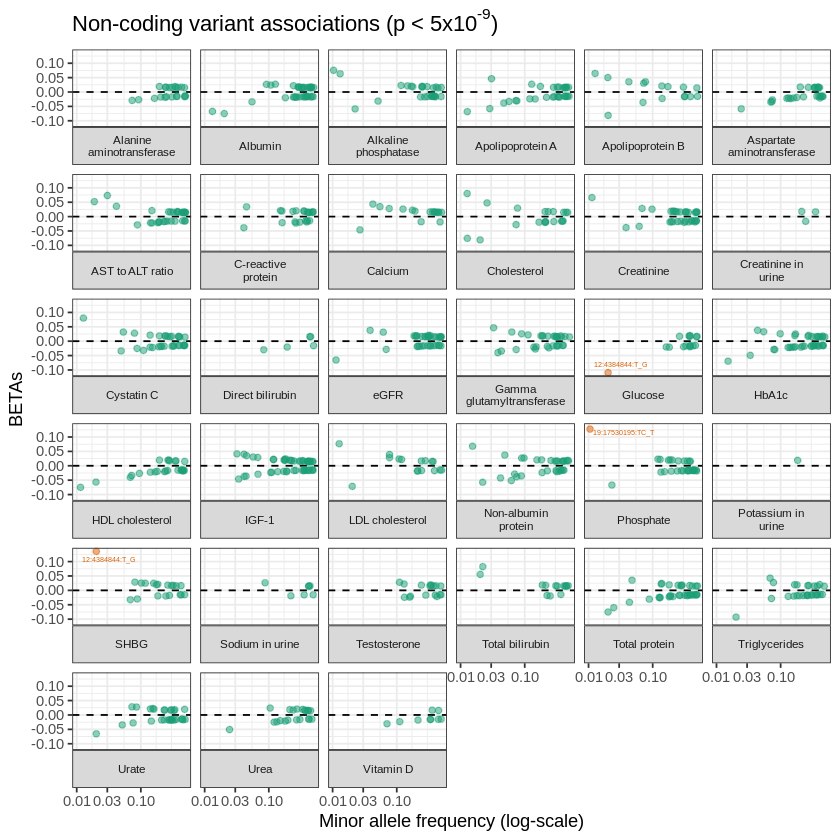

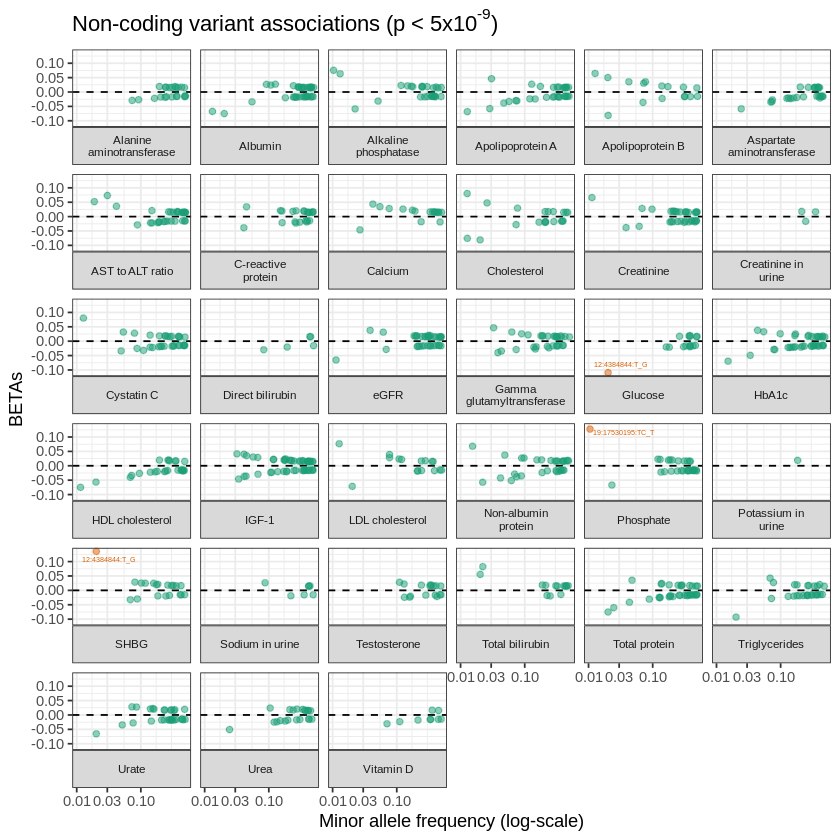

In [13]:
p.imp + ggsave(file.path(outd, "cascade.imp.png"), width = 10, height = 15)
p.imp + ggsave(file.path(outd, "cascade.imp.pdf"), width = 10, height = 15)
